## ***ANALYSE DES DONNEES DE NETFLIX***

L'analyse des données de netflix obtenu sur Kaggle aura pour objetifs determiner :
- le nombre de contenu ajouté par année, par pays, par directeurs , par type et par catégorie
- le top 10 des pays ayant le plus de contenu
- le top 10 selon chaque catégorie et chaque type de contenu
- le top 10 des directeurs ayant le plus de contenu
- la distribution des notations sur netflix


1 - Importation des librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

2 - Chargement des données

In [2]:
donnee_netflix = pd.read_csv('/content/netflix1.csv')

In [3]:
# Affichage de 5 lignes de données
donnee_netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
# Info des données
donnee_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
# Taille des données
donnee_netflix.shape

(8790, 10)

In [6]:
# Identification des pourcentage de valeurs nulls par rapport au valeurs dans les données
donnee_netflix.isnull().sum()/donnee_netflix.shape[0]*100

show_id         0.0
type            0.0
title           0.0
director        0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
dtype: float64

In [7]:
#Verification de la redondance des données
donnee_netflix.duplicated().sum()

0

In [8]:
# convertir le type de la colonne date_added
donnee_netflix['date_added'] = pd.to_datetime(donnee_netflix['date_added'])

ANALYSE DE DONNEES

In [9]:
#distribution des types de contenu de netflix
donnee_netflix['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

<Axes: ylabel='count'>

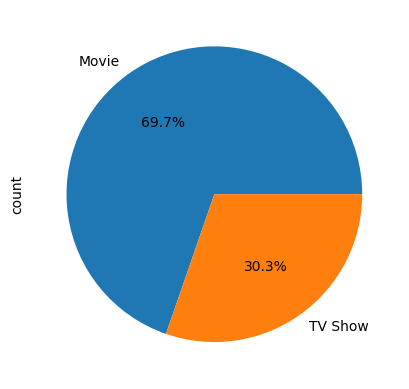

In [10]:
#distribution des types de contenu de netflix avec le pie
donnee_netflix['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

les films (movie) representent 69.7% du contenu proposé par netflix et les series représentent 30.3%

In [17]:
#nombre de contenu ajouté par an
donnee_netflix['date_added'].value_counts()

date_added
2020-01-01    110
2019-11-01     91
2018-03-01     75
2019-12-31     74
2018-10-01     71
             ... 
2015-06-26      1
2015-06-23      1
2015-06-01      1
2015-05-29      1
2014-04-01      1
Name: count, Length: 1713, dtype: int64

In [18]:
donnee_netflix['year']=donnee_netflix['date_added'].dt.year
donnee_netflix['month']=donnee_netflix['date_added'].dt.month
donnee_netflix['day']=donnee_netflix['date_added'].dt.day

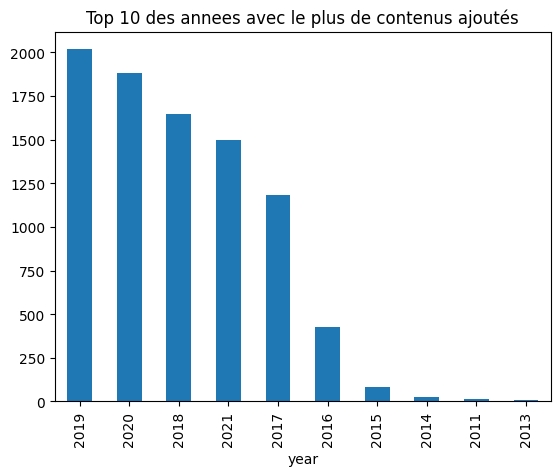

In [19]:
#Top 10 des annees avec le plus de contenus ajoutés avec un diagramme
donnee_netflix['year'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des annees avec le plus de contenus ajoutés')
plt.show()

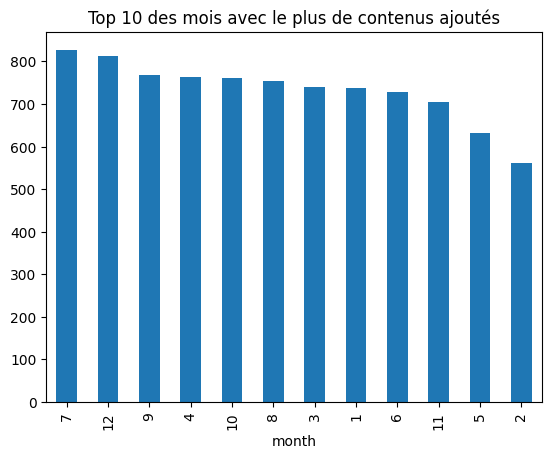

In [21]:
#Top 10 des mois avec le plus de contenus ajoutés avec un diagramme
donnee_netflix['month'].value_counts().plot(kind='bar')
plt.title('Top 10 des mois avec le plus de contenus ajoutés')
plt.show()


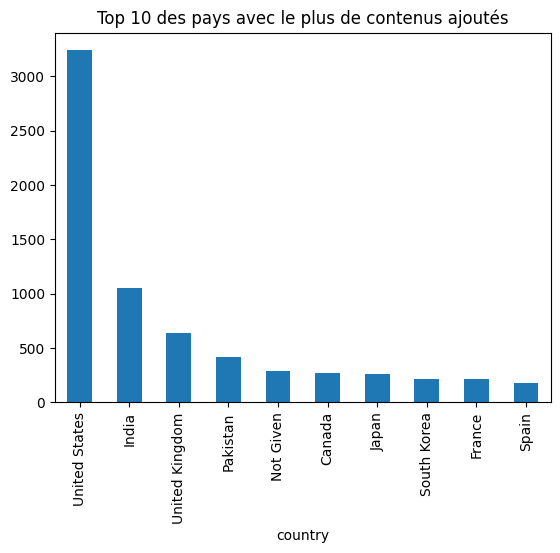

In [22]:
#Top 10 des pays avec le plus de contenus ajoutés sur un diagramme
donnee_netflix['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des pays avec le plus de contenus ajoutés')
plt.show()

In [24]:
#exclure Not Given dans les directeurs
donnee_netflix2 = donnee_netflix[donnee_netflix['director'] != 'Not Given']

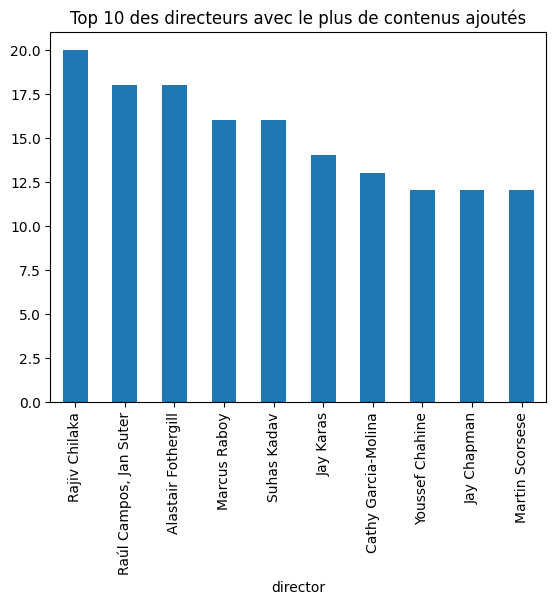

In [25]:
#Top 10 des directeurs avec le plus de contenus ajoutés sur un diagramme
donnee_netflix2['director'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des directeurs avec le plus de contenus ajoutés')
plt.show()

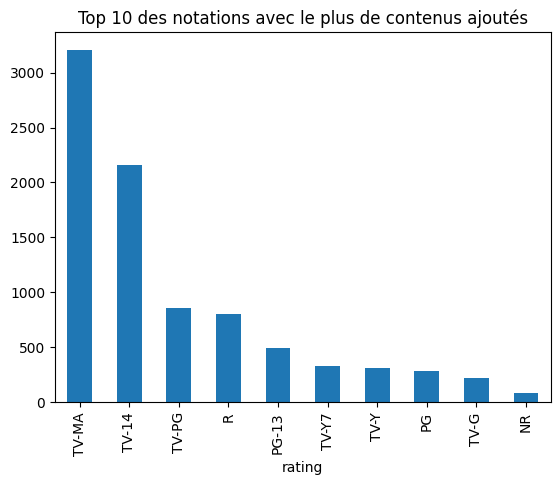

In [26]:
#Top 10 des notations avec le plus de contenus ajoutés sur un diagramme
donnee_netflix['rating'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 des notations avec le plus de contenus ajoutés')
plt.show()

<Axes: ylabel='count'>

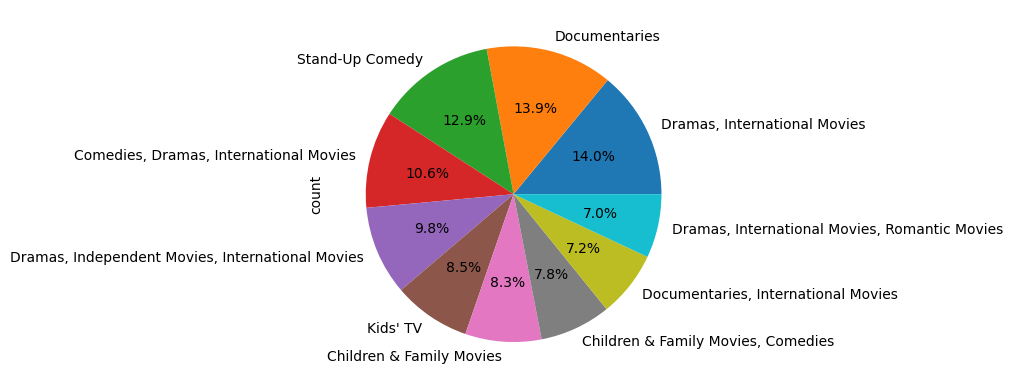

In [28]:
#Top 10 des categories avec le plus de contenus ajoutés sur un diagramme pie
donnee_netflix['listed_in'].value_counts().head(10).plot(kind='pie',autopct='%1.1f%%')

In [31]:
durations = donnee_netflix.groupby(['duration', 'type'])['duration'].value_counts().reset_index()
durations

,duration,type,count
0,1 Season,TV Show,1791
1,10 Seasons,TV Show,6
2,10 min,Movie,1
3,100 min,Movie,108
4,101 min,Movie,116
...,...,...,...
215,95 min,Movie,137
216,96 min,Movie,130
217,97 min,Movie,146
218,98 min,Movie,120


In [32]:
top_10_movie_durations = durations[durations['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_movie_durations

,duration,type,count
210,90 min,Movie,152
213,93 min,Movie,146
214,94 min,Movie,146
217,97 min,Movie,146
211,91 min,Movie,144
215,95 min,Movie,137
216,96 min,Movie,130
212,92 min,Movie,129
5,102 min,Movie,122
218,98 min,Movie,120


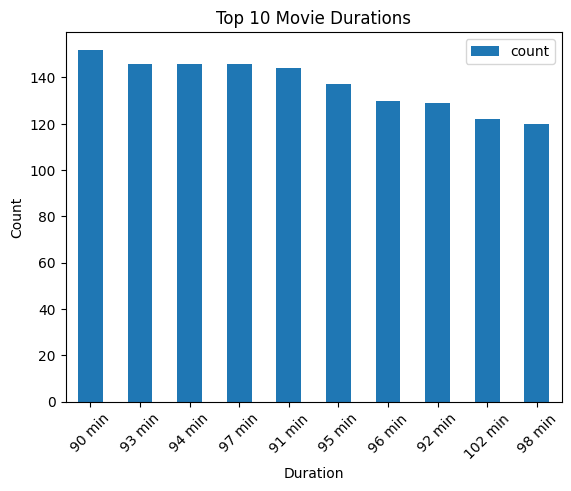

In [33]:
top_10_movie_durations.plot(x='duration', y='count', kind='bar')
plt.title('Top 10 Movie Durations')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [34]:
top_10_TV_Show_durations = durations[durations['type'] == 'TV Show'].sort_values(by='count', ascending=False).iloc[0:10]
top_10_TV_Show_durations

,duration,type,count
0,1 Season,TV Show,1791
110,2 Seasons,TV Show,421
138,3 Seasons,TV Show,198
151,4 Seasons,TV Show,94
162,5 Seasons,TV Show,64
174,6 Seasons,TV Show,33
185,7 Seasons,TV Show,23
196,8 Seasons,TV Show,17
208,9 Seasons,TV Show,9
1,10 Seasons,TV Show,6


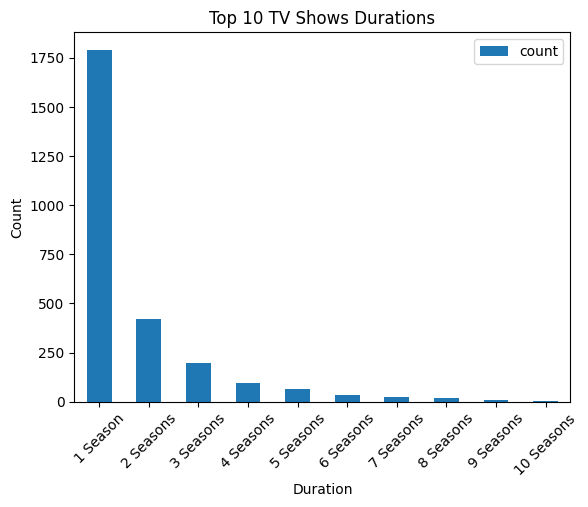

In [35]:
top_10_TV_Show_durations.plot(x='duration', y='count', kind='bar')
plt.title('Top 10 TV Shows Durations')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()